### 개요
- 그리디 알고리즘은 현재상황에서 지금 당장 좋은것 고르기
- 가장 좋아 보이는 것을 반복적으로 선택해 최적의 해 구함

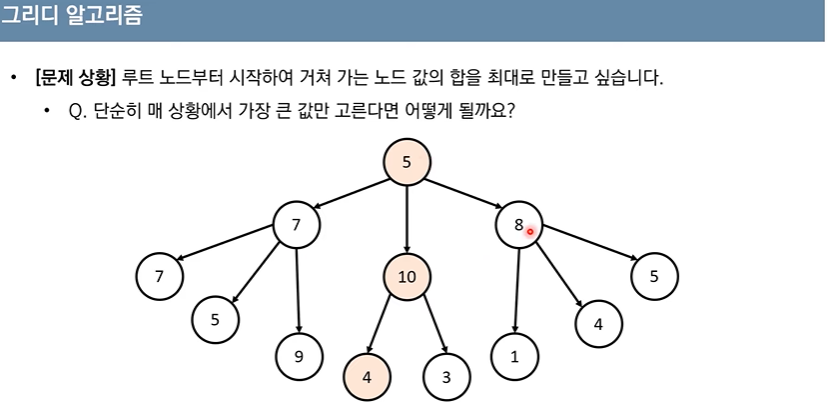

- 최적의 해는 5->7->9가 최적의 해이다.
- 하지만 매 상황에서 가장 큰 값만 고른다면 최적의 해가 될 수 없다.
- 따라서 그리디 알고리즘은 최적의 해를 보장할 수 없을때가 많으므로 유의해야 한다.

#### 문제 1. 거스름 돈 문제
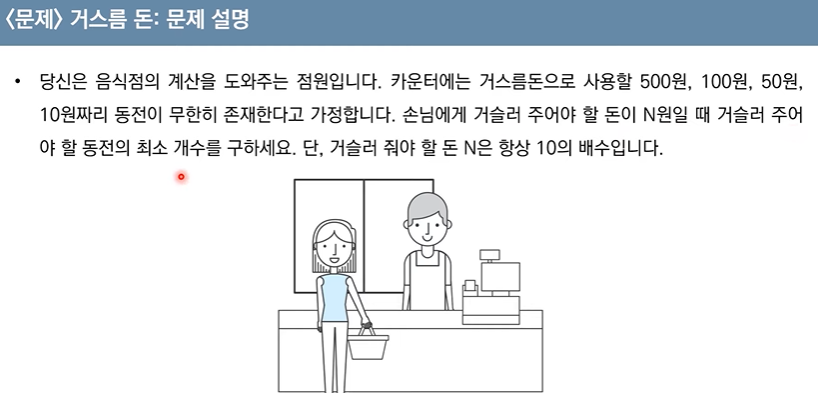

In [7]:
money = int(input())
coins = 0
unit = [500,100,50,10]
for i in unit:
    if money / i > 0:
        coins += money//i
        money %= i
print(coins)


870
7


#### 문제 2. 1이 될때 까지
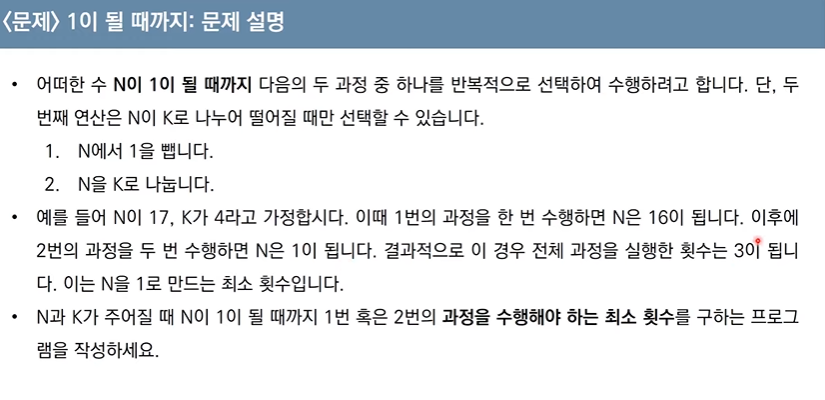
- 1<=N<=100000, 2<=K<=100000

##### 기존에 내가 접근할 방식
- BFS를 통해 해결하려 시도 했음

In [13]:
from collections import deque

MAX = 100001
N,K = map(int, input().split())
array = [0]*MAX

def BFS(start):
    queue = deque([start])
    while queue:
        now_pos = queue.popleft()
        if now_pos == 1:
            return array[now_pos]
        if now_pos % K == 0:
            for next_pos in (int(now_pos/K),now_pos-1):
                if 0<=next_pos and not array[next_pos]:
                    array[next_pos] = array[now_pos] + 1
                    queue.append(next_pos)
        else:
            next_pos = now_pos-1
            if 0<=next_pos and not array[next_pos]:
                array[next_pos] = array[now_pos] + 1
                queue.append(next_pos)
print(BFS(N))

25 5
2


##### 그리디를 통한 해결
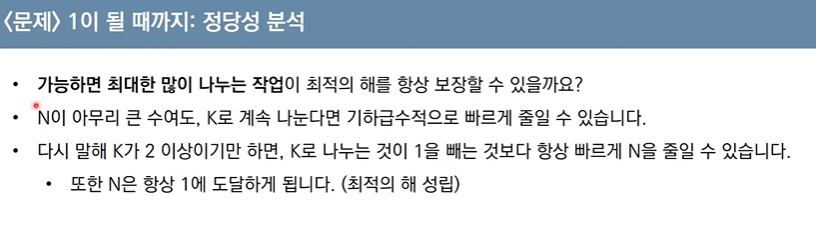
- 가능하다면 나눗셈 연산을 먼저 수행
- 수를 줄이기 위해 나눗셈 연산을 우선적으로 수행하면 최적의 해 구함

In [14]:
n,k = map(int,input().split())

result = 0

while True:
    target = (n//k) *k
    result += (n-target)
    n = target
    
    if n<k:
        break
        
    result += 1
    n //= k
    
result += (n-1)
print(result)

25 5
2


#### 문제 3. 곱하거나 더하거나
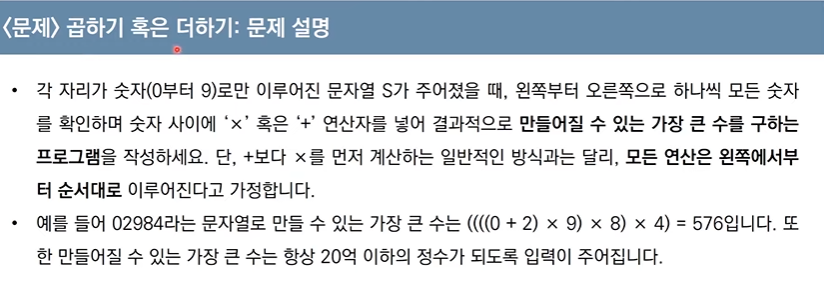
- 1<= S의 길이 <= 20
- 입력1: 02984 출력: 576
- 입력2: 567   출력: 210

##### 내 답

In [23]:
S = list(map(int,input()))
sum = S[0]

for i in range(1,len(S)):
    if S[i-1] == 0 or S[i-1] == 1:
        sum += S[i]
    else:
        sum *= S[i]

print(sum)

567
210


##### 답안

In [25]:
data = input()

result = int(data[0])

for i in range(1,len(data)):
    num = int(data[i])
    if num <= 1 or result <=1:
        result += num
    else:
        result *= num
print(result)

02984
576


#### 문제 4. 모함가 길드
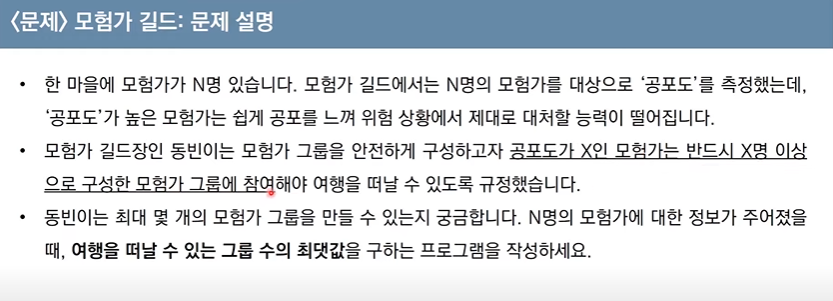


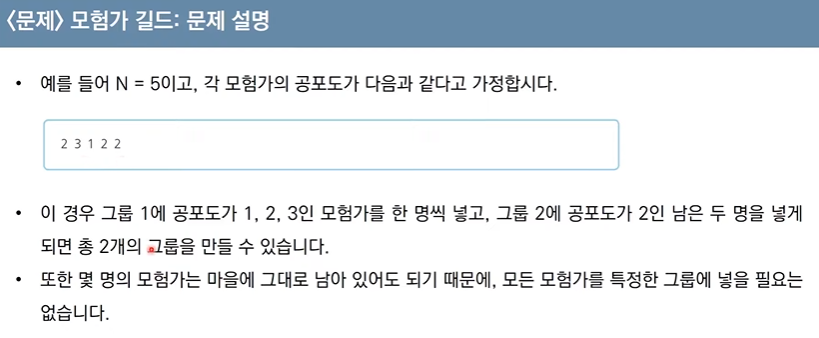
- 1<= N <= 100000

##### 내 답
- 오름차순 정렬 후 공포도와 크루 수가 만족한다면 clear()한다

In [26]:
N = int(input())
Party = list(map(int,input().split()))
Party.sort()
guild, total = [], 0
while Party:
    crew = Party.pop(0)
    guild.append(crew)
    if len(guild) == crew:
        guild.clear()
        total +=1
print(total)

5
2 3 1 2 2
2


##### 답안

In [27]:
n = int(input())
data = list(map(int, input().split()))
data.sort()

result = 0
count = 0

for i in data:
    count+=1
    if count >= i:
        result += 1
        count = 0
        
print(result)

5
2 3 1 2 2
2
